# Análisis de Datos de Vehículos y Modelado Predictivo

Este cuaderno contiene un análisis exploratorio de datos y un modelo predictivo para estimar el precio de venta de vehículos basado en las características proporcionadas.

## 1. Carga de Datos

Primero, cargamos el dataset y observamos sus primeras filas y su estructura.


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

import pandas as pd

# Cargar el dataset
data = pd.read_csv('nuevo_dataset_20000.csv')
data.head()

,year,make,model,trim,body,transmission,state,condition,odometer,mmr,sellingprice
0,2014,Chevrolet,Impala Limited,LT Fleet,Sedan,automatic,fl,4.0,21507.0,13450.0,13800.0
1,2003,Dodge,Ram Pickup 1500,SLT,Quad Cab,NaN,mo,31.0,79712.0,6025.0,6300.0
2,2007,Pontiac,G6,GT,Convertible,automatic,nj,34.0,65698.0,7375.0,8000.0
3,2011,Toyota,Corolla,LE,Sedan,automatic,fl,43.0,23634.0,10800.0,11400.0
4,2012,Lexus,ES 350,Base,Sedan,NaN,pa,35.0,26483.0,22500.0,23300.0


## 2. Limpieza de Datos
Se identifican y manejan los valores nulos, y se transforman algunas columnas para que puedan ser utilizadas en el modelo predictivo.

In [8]:
# Mostrar información del dataset
data.info()

# Eliminar las columnas directamente
data_clean = data.drop(['make', 'model', 'trim', 'body', 'transmission', 'state'], axis=1)

# Mostrar el DataFrame resultante
print(data_clean.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          20000 non-null  int64  
 1   make          19662 non-null  object 
 2   model         19659 non-null  object 
 3   trim          19647 non-null  object 
 4   body          19553 non-null  object 
 5   transmission  17635 non-null  object 
 6   state         20000 non-null  object 
 7   condition     19564 non-null  float64
 8   odometer      19997 non-null  float64
 9   mmr           19999 non-null  float64
 10  sellingprice  20000 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1.7+ MB
   year  condition  odometer      mmr  sellingprice
0  2014        4.0   21507.0  13450.0       13800.0
1  2003       31.0   79712.0   6025.0        6300.0
2  2007       34.0   65698.0   7375.0        8000.0
3  2011       43.0   23634.0  10800.0       11400.0
4  2012   

## 3. Análisis Exploratorio
Visualización y análisis de las principales características del dataset.

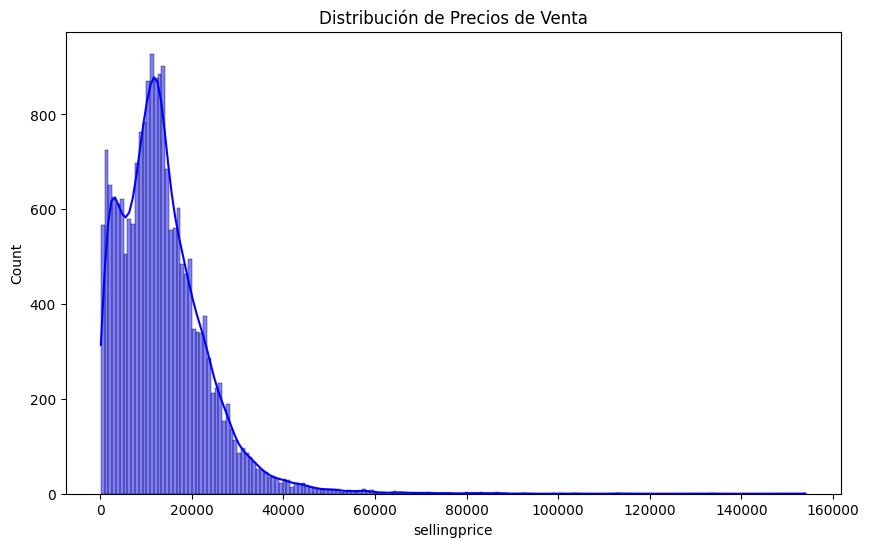

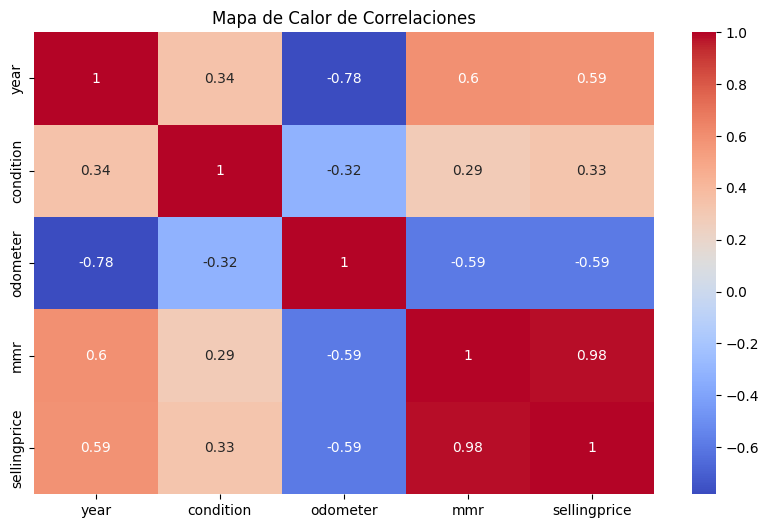

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de precios de venta
plt.figure(figsize=(10,6))
sns.histplot(data_clean['sellingprice'], kde=True, color='blue')
plt.title('Distribución de Precios de Venta')
plt.show()

# Correlaciones entre características numéricas
plt.figure(figsize=(10,6))
sns.heatmap(data_clean.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

## 4. Preparación de Datos para el Modelo
Se preparan las características y la variable objetivo para entrenar el modelo de regresión lineal.

In [10]:
# Selección de características relevantes
features = ['year', 'odometer', 'mmr', 'condition']
X = data_clean[features]
y = data_clean['sellingprice']

# División del dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=500/20000, random_state=42)

## 5. Modelo de Regresión Lineal
Entrenamiento del modelo y evaluación de su desempeño.